
# Field data inversion ("Example" 2023)

## Initialization cells

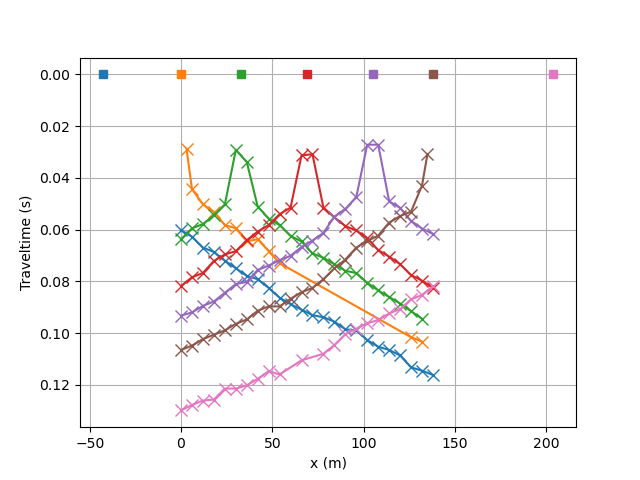

In [5]:
%run Init_Seismic_Inversion_3.4.py
%matplotlib ipympl
import matplotlib.pyplot as plt

## Input shot positions and corresponding filename for picked arrivals:

In [6]:
HBox([col_1, col_2, col_3, col_4])

## Import and plot unified data file

In [7]:
fout=fpath.value + uni2file.value
data = pg.DataContainer(fout, "s g t")
ra = TravelTimeManager(fout)
print(data)

Data: Sensors: 31 data: 164, nonzero entries: ['err', 'g', 's', 't', 'valid']


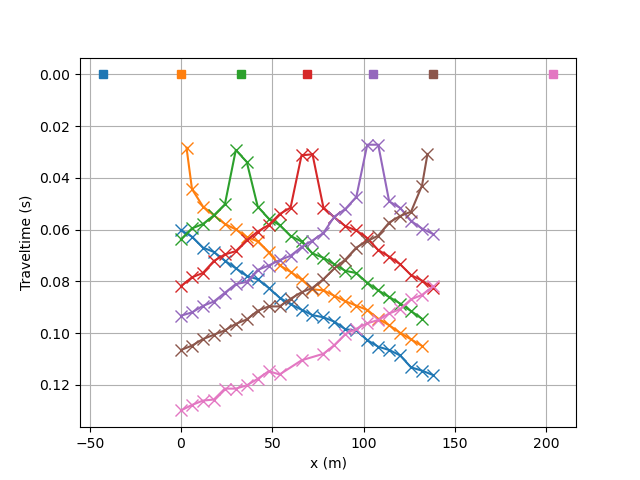

In [8]:
ra.showData(firstPicks=True);  # show first arrivals as curves (done later with response)
#ra.showData(firstPicks=False);

# Inversion
call `invert` to estimate model. The mesh is created on-the-fly based on the sensor positions

### OPTIONAL PARAMETERS AND SOME INDICATIVE VALUES:
<code>
 maxIter=12             | Will stop after maxIter cycles if not converged yet 
 quality = 28           | Quality of the mesh. lower if code crashes.
 useGradient=True       | Inital model has a vertical velocity gradient or not
 vTop=150, vBottom=3000 | Initial model gradient is imposed by setting top and bottom velocities.
                          Usually leave these out by commenting them with #
 limits=[150,3000]      | Limits to max and min possible velocities in model.
                          Use max min estimates from linear fit of arrival times.
 paraMaxCellSize=10     | Limit the size of the cells in the mesh. Small look nicer but slower. 
                          Increase if code crashes. Start testing with large values. 
                          When happy with result, reduce to approximate geophone spacing. 
 paraDepth=50           | Likely penetration depth of the survey, plus some
 zWeight=0.1            | 0-1, smaller value will perfer layered solution. 
 lam= 50                | Regularisation parameter, will prefer smoother (reduced curvature) solutions if large
                          Large lam will also converge faster.
 cType=1                | Set the type of mninimisation process, should not make a big difference
 verbose=1              | Printout a lot of info if set to 1
</code>


In [17]:
ra = TravelTimeManager(fout)

ra.invert(maxIter=12, 
          quality = 28,
          useGradient=False, 
          #vTop=150, vBottom=300, 
          limits=[200,3400],
          paraMaxCellSize=5, paraDepth=40,
          zWeight=0.2, cType=3, lam= 60,
          verbose=0)


./core/src/meshentities.cpp:36		GIMLI::Boundary* GIMLI::findBoundary_(const std::set<Boundary*>&)  pls. check, this should not happen.  There is more than one boundary defined.2
Boundary 0x5580ae6a50a0 rtti: 22 id: 0	N: 0 1  marker: 1 
Boundary 0x5580b18464e0 rtti: 22 id: 62	N: 4 0  marker: -1 
20/05/24 - 20:55:48 - pyGIMLi - INFO - Found 1 regions.
20/05/24 - 20:55:48 - pyGIMLi - INFO - Found 1 regions.
20/05/24 - 20:55:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/05/24 - 20:55:48 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
20/05/24 - 20:55:48 - pyGIMLi - INFO - Create constant starting model: 0.001209413385072348
20/05/24 - 20:55:48 - pyGIMLi - INFO - Created startmodel from forward operator: 3084, min/max=0.001209/0.001209


3084 [1751.8690476957677,...,1734.7423382256602]

## Plot the resulting model

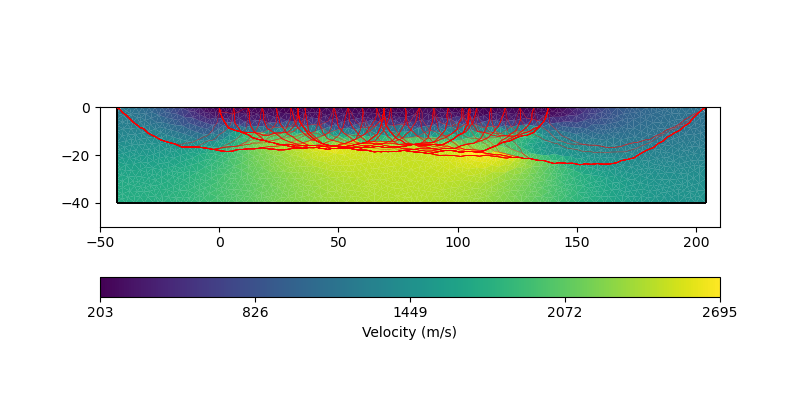

In [18]:
fig,ax=plt.subplots(figsize=(8,4))
ra.showResult(ax=ax, logScale=False)
ra.drawRayPaths(ax=ax, color="r", lw=.5, alpha=.5)
ax.set_ylim(bottom=-50)
ax.set_xlim(-50,210);